#Credit Card Fraud Detection

In [42]:
import numpy as np
import pandas as pd

In [43]:
df = pd.read_csv('fraudTrain.csv')


#Data Preprocessing

In [44]:
df.shape

(1296675, 23)

In [45]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [46]:
df.shape

(1296675, 23)

In [47]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [48]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [49]:
df.drop('trans_date_trans_time', axis=1, inplace=True)

In [50]:
df['merchant'].value_counts()

merchant
fraud_Kilback LLC                       4403
fraud_Cormier LLC                       3649
fraud_Schumm PLC                        3634
fraud_Kuhn LLC                          3510
fraud_Boyer PLC                         3493
                                        ... 
fraud_Douglas, DuBuque and McKenzie      775
fraud_Treutel-King                       775
fraud_Medhurst, Labadie and Gottlieb     759
fraud_Reichert-Weissnat                  753
fraud_Hahn, Douglas and Schowalter       727
Name: count, Length: 693, dtype: int64

In [51]:
df.drop('merchant', axis=1, inplace=True)

In [52]:
df['category'].value_counts()

category
gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: count, dtype: int64

In [53]:
deleted_columns = df[['first','last','street']]
df.drop(deleted_columns, axis=1, inplace=True)

In [54]:
df.head()

,cc_num,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [55]:
df.isnull().sum()

cc_num        0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [56]:
df = df.dropna()

In [57]:
df.isnull().sum()

cc_num        0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [58]:
!pip install folium

In [59]:
df.drop('trans_num', axis=1, inplace=True)

In [60]:
df.drop('unix_time', axis=1, inplace=True)

In [61]:
df.drop('dob', axis=1, inplace=True)

In [62]:
df.drop('job', axis=1, inplace=True)

In [63]:
df['state'].value_counts()

state
TX    94876
NY    83501
PA    79847
CA    56360
OH    46480
MI    46154
IL    43252
FL    42671
AL    40989
MO    38403
MN    31714
AR    31127
NC    30266
WI    29368
VA    29250
SC    29190
KY    28475
IN    27580
IA    26985
OK    26671
MD    26193
GA    26063
WV    25691
NJ    24603
NE    24168
KS    22996
MS    21188
LA    20965
WY    19322
WA    18924
OR    18597
TN    17554
ME    16505
NM    16407
ND    14786
CO    13880
MA    12376
SD    12324
VT    11768
MT    11754
AZ    10770
UT    10699
NH     8278
CT     7702
NV     5607
ID     5545
DC     3613
HI     2559
AK     2120
RI      550
DE        9
Name: count, dtype: int64

In [64]:
df.drop('state', axis=1, inplace=True)

In [65]:
df.head()

,cc_num,category,amt,gender,city,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,2703186189652095,misc_net,4.97,F,Moravian Falls,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,630423337322,grocery_pos,107.23,F,Orient,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,38859492057661,entertainment,220.11,M,Malad City,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,3534093764340240,gas_transport,45.00,M,Boulder,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,375534208663984,misc_pos,41.96,M,Doe Hill,24433,38.4207,-79.4629,99,38.674999,-78.632459,0


In [66]:
df.drop('city', axis=1, inplace=True)

In [67]:
df.drop('cc_num', axis=1, inplace=True)

In [68]:
df.drop('category', axis=1, inplace=True)

In [69]:
df.head()

,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,4.97,F,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,107.23,F,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,220.11,M,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,45.00,M,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,41.96,M,24433,38.4207,-79.4629,99,38.674999,-78.632459,0


In [70]:
df['gender'].value_counts()

gender
F    709863
M    586812
Name: count, dtype: int64

In [71]:
df.shape

(1296675, 9)

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

In [73]:
df.head()

,amt,gender,zip,lat,long,city_pop,merch_lat,merch_long,is_fraud
0,4.97,0,28654,36.0788,-81.1781,3495,36.011293,-82.048315,0
1,107.23,0,99160,48.8878,-118.2105,149,49.159047,-118.186462,0
2,220.11,1,83252,42.1808,-112.2620,4154,43.150704,-112.154481,0
3,45.00,1,59632,46.2306,-112.1138,1939,47.034331,-112.561071,0
4,41.96,1,24433,38.4207,-79.4629,99,38.674999,-78.632459,0


In [74]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [75]:
df.drop('zip', axis=1, inplace=True)

In [76]:
df.drop('lat', axis=1, inplace=True)

In [77]:
df.drop('long', axis=1, inplace=True)

In [78]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [79]:
df.shape

(1296675, 6)

In [80]:
df.head()

,amt,gender,city_pop,merch_lat,merch_long,is_fraud
0,4.97,0,3495,36.011293,-82.048315,0
1,107.23,0,149,49.159047,-118.186462,0
2,220.11,1,4154,43.150704,-112.154481,0
3,45.00,1,1939,47.034331,-112.561071,0
4,41.96,1,99,38.674999,-78.632459,0


In [81]:
df.dtypes

amt           float64
gender          int32
city_pop        int64
merch_lat     float64
merch_long    float64
is_fraud        int64
dtype: object

In [82]:
print(df['is_fraud']==1)

NameError: name 'is_fraud' is not defined

In [ ]:
X = df.drop("is_fraud", axis=1)
y = df['is_fraud']

In [ ]:
from imblearn.under_sampling import NearMiss
nearmiss = NearMiss()
X, y = nearmiss.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
!pip install imblearn

In [ ]:
X.shape

(15012, 5)

In [ ]:
y.shape

(15012,)

#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression(max_iter=10000)
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy*100)
print("Precision:", precision*100)

Accuracy: 90.07659007659008
Precision: 98.9448051948052


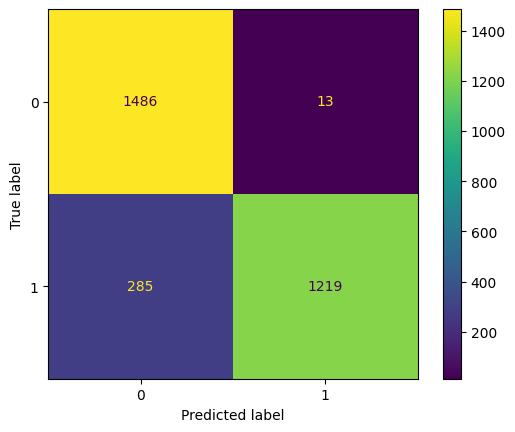

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix = matrix)
disp.plot()

In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(logistic_reg, pickle_out)
pickle_out.close()

In [ ]:
logistic_reg.predict([[4.97,0,3495,	36.011293,	-82.048315]])

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)